## Проектная работа по модулю “Математика и статистика в Python”

In [515]:
import pandas as pd
import scipy.stats as sts
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### 1. Загрузить файл HR.csv

In [516]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [518]:
mean = df.mean()
print(f'Выборочное среднее: \n\n{mean}')

Выборочное среднее: 

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64


In [519]:
#медиана
med = df.median()
print(f'Медиана: \n\n{med}')

Медиана: 

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64


In [520]:
var = df.var()
print(f'Выборочная дисперсия: \n\n{var}')

Выборочная дисперсия: 

satisfaction_level          0.061817
last_evaluation             0.029299
number_project              1.519284
average_montly_hours     2494.313175
time_spend_company          2.131998
Work_accident               0.123706
left                        0.181411
promotion_last_5years       0.020817
dtype: float64


In [521]:
s = df.var()**0.5
print(f'Выборочное стандартное отклонение: \n\n{s}')

Выборочное стандартное отклонение: 

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64


In [522]:
min_df = df.min()
print(f'Минимальное значение: \n\n{min_df}')

Минимальное значение: 

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
sales                      IT
salary                   high
dtype: object


In [523]:
max_df = df.max()
print(f'Максимальное значение: \n\n{max_df}')

Максимальное значение: 

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
sales                    technical
salary                      medium
dtype: object


In [524]:
mod = df.mode()
print(f'Мода: \n\n{mod.T}')

Мода: 

                           0    1
satisfaction_level       0.1  NaN
last_evaluation         0.55  NaN
number_project             4  NaN
average_montly_hours     135  156
time_spend_company         3  NaN
Work_accident              0  NaN
left                       0  NaN
promotion_last_5years      0  NaN
sales                  sales  NaN
salary                   low  NaN


In [525]:
IQR = df.quantile(0.75)-df.quantile(0.25)
print(f'Интерквартильный размах: \n\n{IQR}')

Интерквартильный размах: 

satisfaction_level        0.38
last_evaluation           0.31
number_project            2.00
average_montly_hours     89.00
time_spend_company        1.00
Work_accident             0.00
left                      0.00
promotion_last_5years     0.00
dtype: float64


In [526]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [527]:
corr = df.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


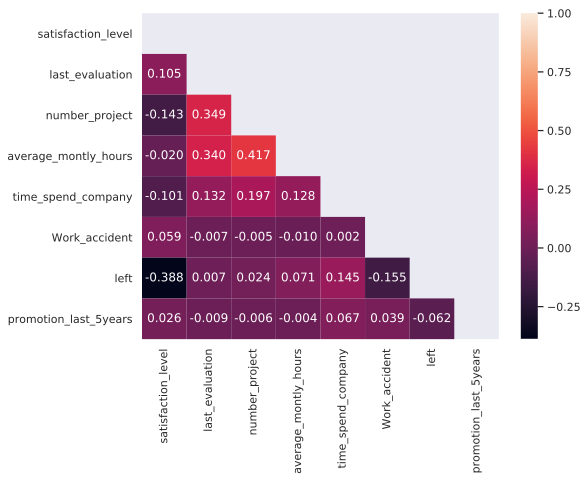

In [528]:
%config InlineBackend.figure_format = 'svg' 


plt.figure(figsize = (8,6))

mask = np.triu(np.ones((len(corr), len(corr))), k=0)

sns.heatmap(corr, annot=True, mask = mask,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            fmt=".3f"
           )

Сильной корреляции между переменными не наблюдается. Наибольшая корреляция у пар: <br>
1) Кол-во проектов - среднее количество часов работы в месяц (прямая корреляция)<br>
2) Уровень удовлетворенности работой - ушел ли работник или нет (обратная корреляция)

Посмотрим на корреляцию параметров внутри подгрупп ушедших и оставшихся в компаннии

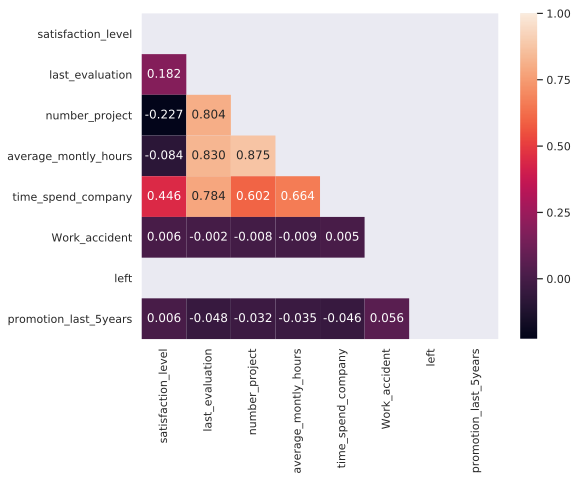

In [529]:
# Подгруппа ушедших
plt.figure(figsize = (8,6))
corr_left = df[df['left']==1].corr()
sns.heatmap(corr_left, annot=True, mask = mask,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            fmt=".3f"
           )


Как видно, в подгруппе ушедших из компании - корреляция признаков гораздо сильнее.

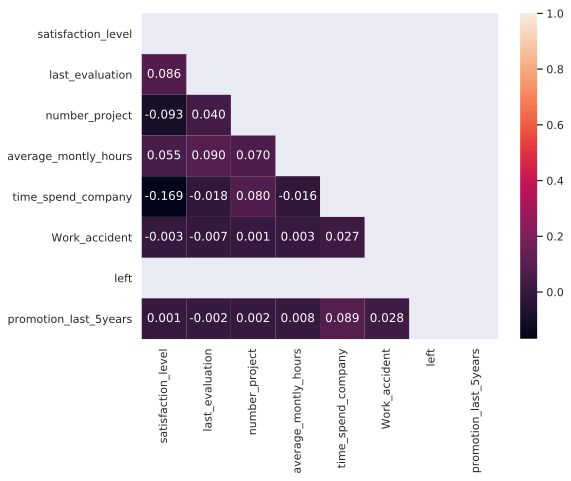

In [530]:
# Подгруппа оставшихся
plt.figure(figsize = (8,6))
corr_stay = df[df['left']==0].corr()
sns.heatmap(corr_stay, annot=True, mask = mask,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            fmt=".3f"
           )

Коррелция у большинства признаков - слабая.

### 4. Визуализировать несколько взаимосвязей между переменными.

Text(0.5,1.02,'Взаимосвязь переменных')

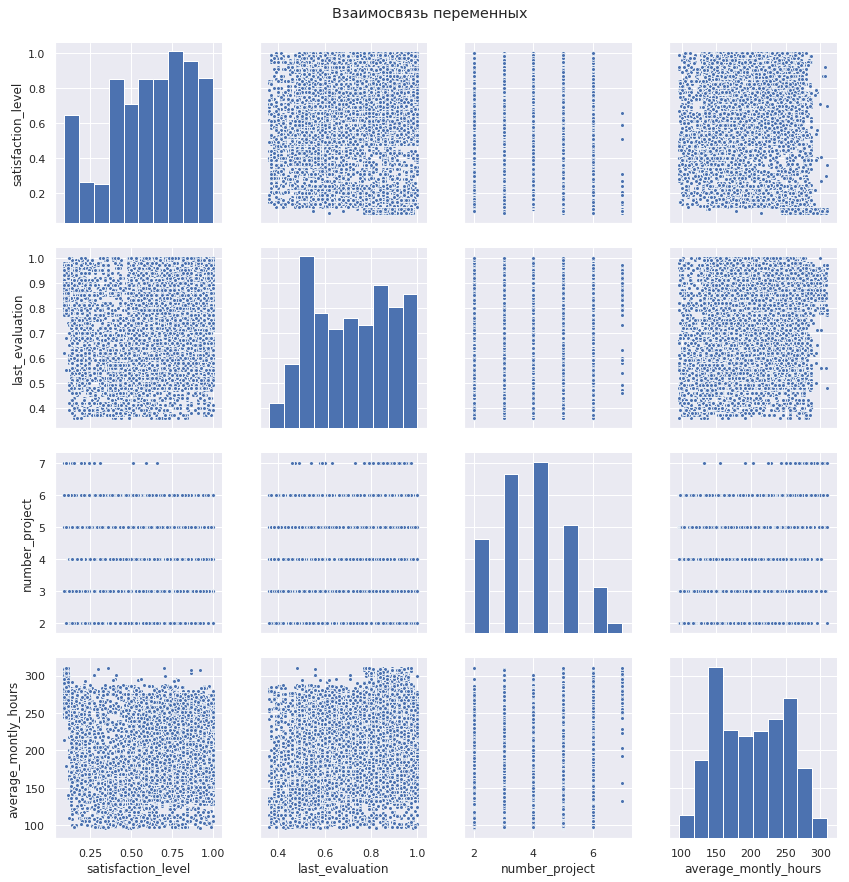

In [531]:
%config InlineBackend.figure_format = 'png' 

g = sns.pairplot(df, vars=df.columns[:4],
            kind='scatter',
            height=3,
            plot_kws={"s": 15})
            

g.fig.suptitle("Взаимосвязь переменных", y=1.02)

### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [532]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


1. Проверим равен ли средний уровень удовлетворенности у сотрудников с низкой и средней зарплатой. <br>
Примем $H_0$ - средний уровень удовлетворенности у сотрудников с низкой и средней зарплатой равны.

In [533]:
sts.ttest_ind(df[df['salary']=='low']['satisfaction_level'], 
              df[df['salary']=='medium']['satisfaction_level'])

Ttest_indResult(statistic=-4.928592335569859, pvalue=8.378854439781171e-07)

Т.к. p = 8.37e-07 отклоняем нулевую гипотезу и принимаем альтернативную - средний уровень удовлетворенности у сотрудников с низкой и средней зарплатой различаются.

2. Проверим равно ли средняя доля ушедших из комании людей у отдела продаж и технического отдела. <br>
Примем $H_0$ - средние доли ушедших из комании людей у отдела продаж и технического отдела равны.

In [534]:
sts.ttest_ind(df[df['sales']=='sales']['left'], 
              df[df['sales']=='technical']['left'])

Ttest_indResult(statistic=-1.0601649378624074, pvalue=0.2891069046174478)

Т.к. p = 0.29 принимаем нулевую гипотезу, что средние доли ушедших из комании людей у отдела продаж и технического отдела равны.

3. Проверим равно ли среднее количество часов работы в месяц  у сотрудников, которые давно работают в компании и новичков. <br>
Примем $H_0$ - среднее количество часов работы в месяц равно.

In [535]:
sts.ttest_ind(df[df['time_spend_company']<=3]['average_montly_hours'], 
              df[df['time_spend_company']>=8]['average_montly_hours'])

Ttest_indResult(statistic=-2.378511363973554, pvalue=0.017401255672791955)

Т.к. p = 0,017 отклоняем нулевую гипотезу и принимаем альтернативную - среднее количество часов работы в месяц различается.

### 6. Рассчитать сколько работников работает в каждом департаменте.

In [536]:
num_of_empl = df[['sales', 'satisfaction_level']].groupby('sales', 
    as_index=False, sort=False).count().sort_values('satisfaction_level', ascending=False)
num_of_empl.columns = ['department', 'number_of_employee']
num_of_empl = num_of_empl.append({'department':'Total', 
        'number_of_employee': num_of_empl['number_of_employee'].sum()}, ignore_index=True)
num_of_empl.reset_index(drop=True)
print('\nКоличество сотрудников по департаментам:')
num_of_empl


Количество сотрудников по департаментам:


,department,number_of_employee
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


### 7. Показать распределение сотрудников по зарплатам.

In [537]:
%config InlineBackend.figure_format = 'svg' 

salary_distr = df[['satisfaction_level', 'salary']].groupby(['salary']).count() / \
    df[['satisfaction_level']].count()*100
salary_distr.columns = ['share']
salary_distr.sort_values('share', ascending=False, inplace=True)

Text(0,0.5,'доля сотрудников в %')

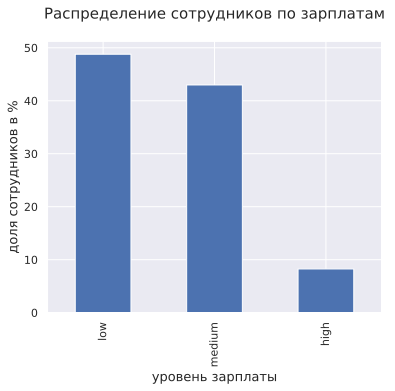

In [538]:
ax = salary_distr.plot(kind='bar', 
                    figsize=(6,5),
                    legend=False)
ax.set_title('Распределение сотрудников по зарплатам\n', fontsize=15)
ax.set_xlabel("уровень зарплаты", fontsize=13)
ax.set_ylabel("доля сотрудников в %", fontsize=13)

### 8. Показать распределение сотрудников по зарплатам совместно с департаментами.

In [539]:
dep_salary_distr = df[['satisfaction_level', 'sales', 
    'salary']].groupby(['sales', 'salary']).count()/\
    df[['sales', 'satisfaction_level']].groupby(['sales']).count()*100

dep_salary_distr.head(6)

satisfaction_level
sales salary                    
IT    high              6.764466
      low              49.633252
      medium           43.602282
RandD high              6.480305
      low              46.251588
      medium           47.268107

In [540]:
dep_salary_distr_piv = dep_salary_distr.pivot_table(
                        index='sales', 
                        columns='salary', 
                        values='satisfaction_level', 
                        )
dep_salary_distr_piv

salary,high,low,medium
sales,,,
IT,6.764466,49.633252,43.602282
RandD,6.480305,46.251588,47.268107
accounting,9.647979,46.675359,43.676662
hr,6.089310,45.331529,48.579161
management,35.714286,28.571429,35.714286
marketing,9.324009,46.853147,43.822844
product_mng,7.538803,50.000000,42.461197
sales,6.497585,50.700483,42.801932
support,6.325707,51.413190,42.261104


In [541]:
dep_salary_distr_piv.sort_values('sales', axis=1, ascending=False, inplace=True)
dep_salary_distr_piv.sort_values('low', ascending=False, inplace=True)

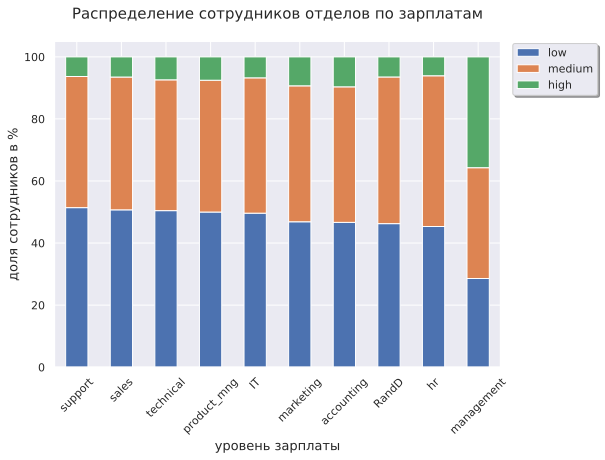

In [542]:
ax = dep_salary_distr_piv.plot(kind='bar', stacked=True, 
    figsize=(8,6), rot=45)
ax.set_title('Распределение сотрудников отделов по зарплатам\n', fontsize=15)
ax.set_xlabel("уровень зарплаты", fontsize=13)
ax.set_ylabel("доля сотрудников в %", fontsize=13)
ax.legend(loc='best', bbox_to_anchor=(1.23, 1.01), shadow=True)

Text(65.5938,0.5,'доля сотрудников в %')

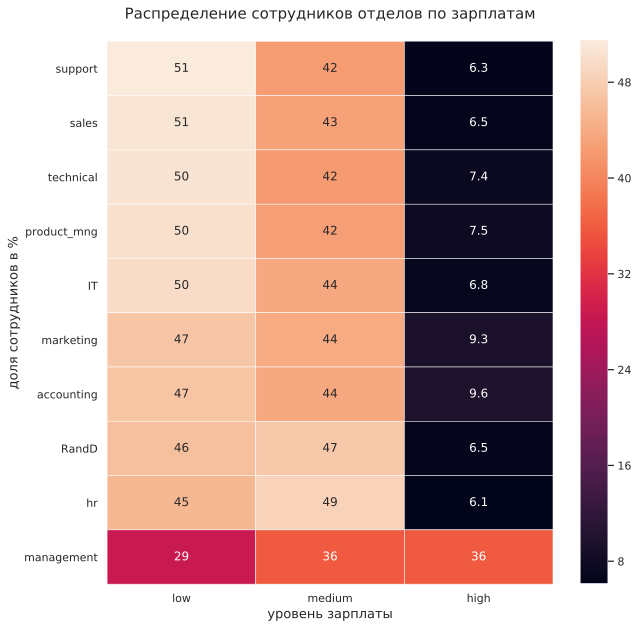

In [543]:
ax = sns.heatmap(dep_salary_distr_piv, annot=True,  
            linewidths=0.5)
ax.set_title('Распределение сотрудников отделов по зарплатам\n', fontsize=15)
ax.set_xlabel("уровень зарплаты", fontsize=13)
ax.set_ylabel("доля сотрудников в %", fontsize=13)

### 9. Сколько сотрудников покинули компанию.

In [544]:
left_num = df['left'][df['left']==1].count()
print(f'Компанию покинули: {left_num} человек')

Компанию покинули: 3571 человек


### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [545]:
%config InlineBackend.figure_format = 'svg'

In [546]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [547]:
df[['satisfaction_level', 'left']].groupby('left').mean()

,satisfaction_level
left,
0,0.666810
1,0.440098


Очевидно, что у ушедших сотрудников, гораздо ниже средний уровень удовлетворенности. Так же можно подсчитать среднее изменение уровня удовлетворенности за последний год.

In [548]:
df['satisfaction_change'] = df['satisfaction_level'] - df['last_evaluation']
df[['satisfaction_change', 'left']].groupby('left').mean()

,satisfaction_change
left,
0,-0.048664
1,-0.278015


Здесь тоже все логично, у тех кто уволился гораздо сильнее упал уровень удовлетворенности.

#### 1. Проверим, как влияла зарплата на уход из компании.

In [549]:
salary_df = df[['salary', 'left', 'satisfaction_level']].\
    groupby(['salary', 'left']).count() / \
    df[['salary', 'satisfaction_level']].groupby(['salary']).count()*100
salary_df.columns = ['share']
salary_piv = salary_df.pivot_table(
                        index='salary', 
                        columns='left', 
                        values='share', 
                        )
# таблица соотношения ушедших/оставшихся в зависимости от зарплаты
salary_piv.sort_values(1, ascending=False)

left,0,1
salary,,
low,70.311646,29.688354
medium,79.568725,20.431275
high,93.371059,6.628941


Как и следовало ожидать, чем ниже зарплата, тем большая доля сотрудников уволилась.

#### 2. Проверим, как влияло кол-во проектов у сотрудников на уход из компании.

In [550]:
number_project_df = df[['number_project', 'left', 'satisfaction_level']].\
    groupby(['number_project', 'left']).count() / \
    df[['number_project', 'satisfaction_level']].groupby(['number_project']).count()*100
number_project_df.columns = ['share']
number_project_piv = number_project_df.pivot_table(
                        index='number_project', 
                        columns='left', 
                        values='share', 
                        )
# таблица соотношения ушедших/оставшихся в зависимости от кол-ва проектов у сотрудника
number_project_piv

left,0,1
number_project,,
2,34.380235,65.619765
3,98.224414,1.775586
4,90.630011,9.369989
5,77.834118,22.165882
6,44.207836,55.792164
7,NaN,100.000000


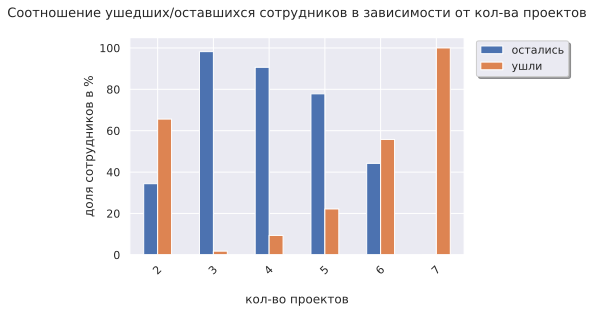

In [551]:
# Для лучшего восприятия построим график
ax = number_project_piv.plot(kind='bar', 
    figsize=(6,4), rot=45, legend='123')
ax.set_title('Соотношение ушедших/оставшихся сотрудников в зависимости от кол-ва проектов\n', fontsize=13)
ax.set_xlabel("\nкол-во проектов", fontsize=12)
ax.set_ylabel("доля сотрудников в %", fontsize=12)
ax.legend(('остались', 'ушли'), loc='best', bbox_to_anchor=(1.02, 1.01), shadow=True)

Как видно из графика самая большая доля ушедших среди перегруженых работой сотрудников с большими количеством проектов: 6-7 (при этом все сотрудники у которых было 7 проектов - уволились), либо среди недогруженых с кол-вом проектов: 2.

Проверим, что у ушедших сотрудников кол-во проектов коррелирует со средним кол-м рабочих часов в месяц

In [552]:
corr_2 = df[df['left']==1][['average_montly_hours', 'number_project']].corr()
corr_2

,average_montly_hours,number_project
average_montly_hours,1.000000,0.875194
number_project,0.875194,1.000000


In [553]:
Корреляция довольно сильная, поэтому отдельно параметр 'average_montly_hours' рассматривать не будем

SyntaxError: invalid syntax (<ipython-input-553-89a52bbc9403>, line 1)

#### 3. Проверим, какое соотношение уволившихся по отделам.

In [554]:
sales_df = df[['sales', 'left', 'satisfaction_level']].\
    groupby(['sales', 'left']).count() / \
    df[['sales', 'satisfaction_level']].groupby(['sales']).count()*100
sales_df.columns = ['share']
sales_piv = sales_df.pivot_table(
                        index='sales', 
                        columns='left', 
                        values='share', 
                        )
# таблица соотношения ушедших/оставшихся в зависимости от отдела
sales_piv.sort_values(1, ascending=False)

left,0,1
sales,,
hr,70.906631,29.093369
accounting,73.402868,26.597132
technical,74.375000,25.625000
support,75.100942,24.899058
sales,75.507246,24.492754
marketing,76.340326,23.659674
IT,77.750611,22.249389
product_mng,78.048780,21.951220
RandD,84.625159,15.374841


Самая большая доля ушедших - в отделе HR, самая маленькая - в R&D и менеджмент. Причин почему в конкретном отделе та или иная текучка - может быть множество.

#### 4. Проверим, как соотносится время работы в компании и увольнение.

In [555]:
time_df = df[['time_spend_company', 'left', 'satisfaction_level']].\
    groupby(['time_spend_company', 'left']).count() / \
    df[['time_spend_company', 'satisfaction_level']].groupby(['time_spend_company']).count()*100
time_df.columns = ['share']
time_piv = time_df.pivot_table(
                        index='time_spend_company', 
                        columns='left', 
                        values='share', 
                        )
# таблица соотношения ушедших/оставшихся в зависимости от времени работы в компании
time_piv

left,0,1
time_spend_company,,
2,98.366215,1.633785
3,75.384138,24.615862
4,65.193586,34.806414
5,43.448744,56.551256
6,70.891365,29.108635
7,100.000000,NaN
8,100.000000,NaN
10,100.000000,NaN


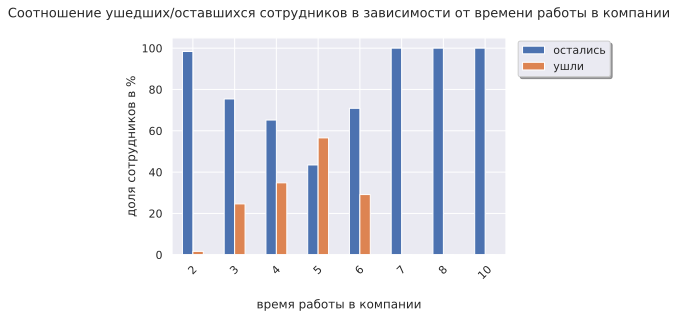

In [556]:
# Для лучшего восприятия построим график
ax = time_piv.plot(kind='bar', figsize=(6,4), rot=45, legend='123')
ax.set_title('Соотношение ушедших/оставшихся сотрудников в зависимости от времени работы в компании\n', fontsize=13)
ax.set_xlabel("\nвремя работы в компании", fontsize=12)
ax.set_ylabel("доля сотрудников в %", fontsize=12)
ax.legend(('остались', 'ушли'), loc='best', bbox_to_anchor=(1.02, 1.01), shadow=True)

Как видно из графика никто из "старых" сотрудников не ушел, также минимальная доля ушедших среди новых сотрудников.

In [557]:
promotion_piv

left,0,1
promotion_last_5years,,
0,75.803815,24.196185
1,94.043887,5.956113


#### 5. Проверим, как влиял факт повышения в течение 5 лет на уход из компании.

In [558]:
promotion_df = df[['promotion_last_5years', 'left', 'satisfaction_level']].\
    groupby(['promotion_last_5years', 'left']).count() / \
    df[['promotion_last_5years', 'satisfaction_level']].groupby(['promotion_last_5years']).count()*100
promotion_df.columns = ['share']
promotion_piv = promotion_df.pivot_table(
                        index='promotion_last_5years', 
                        columns='left', 
                        values='share', 
                        )
# таблица соотношения ушедших/оставшихся в зависимости от факта повышения в течении 5 лет.
promotion_piv

left,0,1
promotion_last_5years,,
0,75.803815,24.196185
1,94.043887,5.956113


Как видно из таблицы, доля уволившихся среди тех, у кого не было повышения в последние 5 лет гораздо выше.

#### 6. Проверим, как влиял факт инцидентов на работе на уход из компании.

In [559]:
accident_df = df[['Work_accident', 'left', 'satisfaction_level']].\
    groupby(['Work_accident', 'left']).count()/ \
    df[['Work_accident', 'satisfaction_level']].groupby(['Work_accident']).count()*100
accident_df.columns = ['share']
accident_piv = accident_df.pivot_table(
                        index='Work_accident', 
                        columns='left', 
                        values='share', 
                        )
# таблица соотношения ушедших/оставшихся в зависимости от наличия инцидентов на работе.
accident_piv

left,0,1
Work_accident,,
0,73.484022,26.515978
1,92.208391,7.791609


Как ни странно, наличие инцидентов положительно влияет на отсутствие увольнений: доля оставшихся сотрудников гораздо выше в группе с инцидентами. Возможно как-то связано со страховыми выплатами.

### ВЫВОД:
На уход сотрудников из компании больше всего влияли следующие факторы:<br>
1) Перегруженность/недогруженность. Причем среди тех у кого было максимальное кол-во проектов (7) уволились все. Также большая доля уволившихся среди тех у кого было минимальное кол-во проектов (2).<br>
2) Низкая заплата.<br>
3) Отдел в котором работает сотрудник. В отделе HR наибольшая текучка. Для выяснения причин высокой текучке в отделе требуется отдельное исследование (зарплата, атмосфера в коллективе, загруженность и др. факторы).<br>
4) Наличие повышения. Среди тех у кого было повышение, доля уволившихся гораздо ниже.<br>

Наличие инцидентов на работе не сказывается отрицательно на увольнение сотрудника. Также минимальное кол-во уволившихся среди 'старых' и новых сотрудников. Почему сотрудники начинают увольнятся по прошествии определенного времени, также следует изучать отдельно.